Q5) Use Naive bayes, K-nearest, and Decision tree classication algorithms and build classiers.
Divide the data set in to training and test set. Compare the accuracy of the different classiers
under the following situations:


 5.1 a) Training set=75% Test set=25% b) Training set=66.6%(2/3rd of
total),Test set=33.3%


5.2 Training set is chosen by i) hold out method ii) Randomsubsampling iii) Cross-Validation.
Compare the accuracy of the classiers obtained.


5.3 Data is scaled to standard format.

In [1]:
import numpy as np #importing numpy for numpy_array
import pandas as pd #Importing Pandas for reading CSV files
import matplotlib.pyplot as plt #importing matplotlib for plotting graphs
import seaborn as sns #importing seaborn for plotting heatmap
from sklearn.model_selection import train_test_split, cross_val_score #importing sklearn for
from sklearn.tree import DecisionTreeClassifier, export_text, export_graphviz #importing skle
from sklearn.metrics import accuracy_score, confusion_matrix #importing sklearn for regressi
from sklearn.neighbors import KNeighborsClassifier #importing sklearn for regression method
from sklearn.preprocessing import MinMaxScaler #importing sklearn for regression method
from sklearn.metrics import classification_report

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
df = pd.read_csv('/content/gdrive/MyDrive/Q5_iris.csv')
df.info

Mounted at /content/gdrive


<bound method DataFrame.info of      sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]>

5.1(a)

In [3]:
import sklearn
from sklearn.datasets import *
dir(sklearn.datasets)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_california_housing',
 '_covtype',
 '_kddcup99',
 '_lfw',
 '_olivetti_faces',
 '_openml',
 '_rcv1',
 '_samples_generator',
 '_species_distributions',
 '_svmlight_format_fast',
 '_svmlight_format_io',
 '_twenty_newsgroups',
 'clear_data_home',
 'dump_svmlight_file',
 'fetch_20newsgroups',
 'fetch_20newsgroups_vectorized',
 'fetch_california_housing',
 'fetch_covtype',
 'fetch_kddcup99',
 'fetch_lfw_pairs',
 'fetch_lfw_people',
 'fetch_olivetti_faces',
 'fetch_openml',
 'fetch_rcv1',
 'fetch_species_distributions',
 'get_data_home',
 'load_boston',
 'load_breast_cancer',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_linnerud',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine',
 'make_biclusters',
 'make_blobs',
 'make_checkerboard',
 'make_circles',
 'make_class

5.1(b)

In [4]:
df=load_iris()
df.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
print(df.filename)
print(df.feature_names)

/usr/local/lib/python3.7/dist-packages/sklearn/datasets/data/iris.csv
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [6]:
df = pd.read_csv('/content/gdrive/MyDrive/Q5_iris.csv')
print(df)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


In [7]:
df=df.drop_duplicates()
X=df.values[:,:-1]
Y=df.values[:,-1]
print(X.shape)
print(Y.shape)


(147, 4)
(147,)


In [8]:
classLabels=np.unique(Y)
classLabels

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [9]:
test_val = 0.25
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=test_val)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(110, 4)
(37, 4)
(110,)
(37,)


Decision Tree Classier
5.2

In [11]:
DTclassifer = DecisionTreeClassifier().fit(X_train,Y_train)

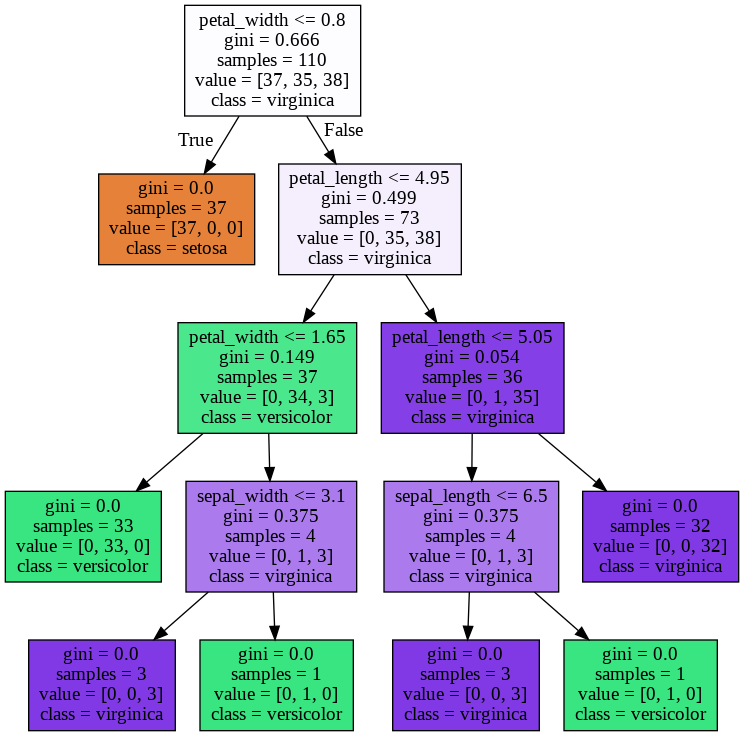

In [13]:
import pydotplus
from IPython.display import Image
dot_data=export_graphviz(DTclassifer, feature_names=df.columns[:-1], class_names=classLabels, filled=True)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [14]:
print(Y_test)
Y_predict=DTclassifer.predict(X_test)
print(Y_predict)

['setosa' 'virginica' 'setosa' 'versicolor' 'virginica' 'versicolor'
 'virginica' 'versicolor' 'setosa' 'versicolor' 'setosa' 'versicolor'
 'virginica' 'virginica' 'virginica' 'virginica' 'versicolor' 'versicolor'
 'setosa' 'virginica' 'setosa' 'versicolor' 'setosa' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'setosa' 'virginica'
 'setosa' 'versicolor' 'versicolor' 'setosa' 'virginica' 'virginica'
 'setosa']
['setosa' 'virginica' 'setosa' 'versicolor' 'virginica' 'versicolor'
 'virginica' 'versicolor' 'setosa' 'versicolor' 'setosa' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'versicolor' 'versicolor'
 'setosa' 'virginica' 'setosa' 'versicolor' 'setosa' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'setosa' 'virginica'
 'setosa' 'versicolor' 'versicolor' 'setosa' 'virginica' 'virginica'
 'setosa']


In [15]:
accuracy_score(Y_test, Y_predict)

0.972972972972973

In [16]:
confusematr=confusion_matrix(Y_test, Y_predict)
confusematr

array([[11,  0,  0],
       [ 0, 14,  1],
       [ 0,  0, 11]])

In [17]:
!pip install mlxtend --upgrade --no-deps

     |████████████████████████████████| 1.4MB 5.5MB/s 
  Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9d1cd08810>)

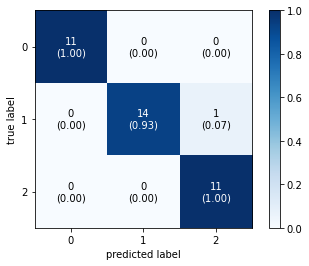

In [18]:
from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(conf_mat=confusematr, colorbar=True, show_absolute=True, show_normed=True)

In [20]:
clf_report=classification_report(Y_test, Y_predict, target_names=classLabels, digits=5, output_dict=True)
print(clf_report)

{'setosa': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 11}, 'versicolor': {'precision': 1.0, 'recall': 0.9333333333333333, 'f1-score': 0.9655172413793104, 'support': 15}, 'virginica': {'precision': 0.9166666666666666, 'recall': 1.0, 'f1-score': 0.9565217391304348, 'support': 11}, 'accuracy': 0.972972972972973, 'macro avg': {'precision': 0.9722222222222222, 'recall': 0.9777777777777779, 'f1-score': 0.9740129935032483, 'support': 37}, 'weighted avg': {'precision': 0.9752252252252251, 'recall': 0.972972972972973, 'f1-score': 0.9730945338141741, 'support': 37}}


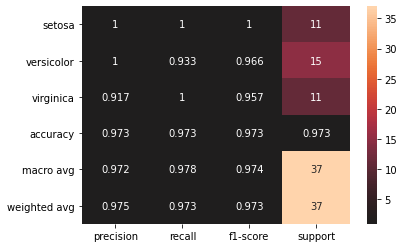

In [21]:
import seaborn as sns
sns.heatmap(pd.DataFrame(clf_report).T, annot=True, fmt='.3g',center=True)

In [22]:
numTimes=10
accuracy=list()
for i in range(numTimes):
 X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=test_val)
 DTclassifer = DecisionTreeClassifier(criterion="entropy").fit(X_train,Y_train)
 Y_predict=DTclassifer.predict(X_test)
 accuracy.append(accuracy_score(Y_test, Y_predict))
print(sum(accuracy)/numTimes)

0.9405405405405405


In [23]:
k=10
scores=cross_val_score(DecisionTreeClassifier(),X,Y,cv=k)
print(scores,scores.mean())

[1.         0.93333333 1.         0.93333333 0.93333333 0.86666667
 0.93333333 1.         1.         1.        ] 0.96


In [24]:
test_val1 =(1/3)
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X,Y,test_size=test_val)
print(X_train1.shape)
print(X_test1.shape)
print(Y_train1.shape)
print(Y_test1.shape)

(110, 4)
(37, 4)
(110,)
(37,)


New Data Classfier

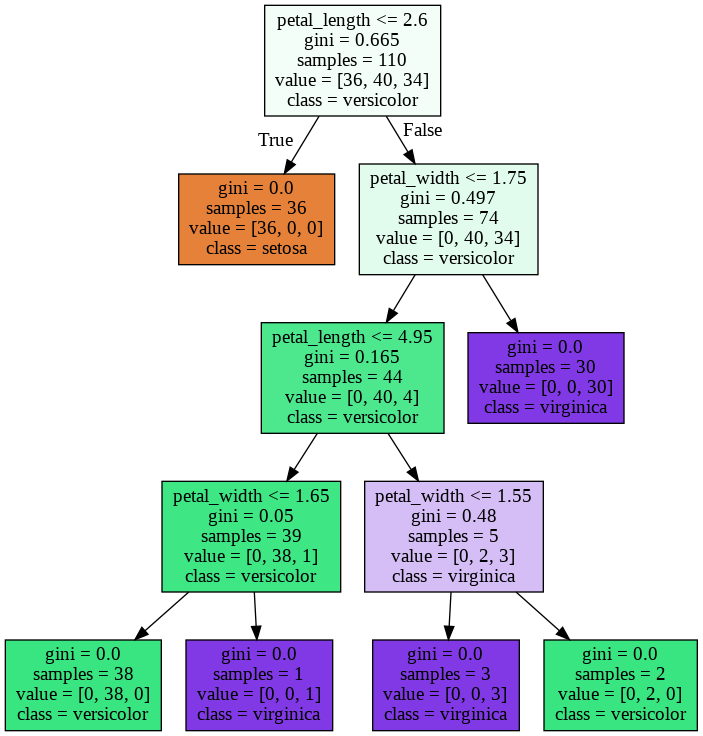

In [27]:
DTclassifer1 = DecisionTreeClassifier().fit(X_train1,Y_train1)
import pydotplus
from IPython.display import Image
dot_data1=export_graphviz(DTclassifer1, feature_names=df.columns[:-1], class_names=classLabels, filled=True)
graph1=pydotplus.graph_from_dot_data(dot_data1)
Image(graph1.create_png())

In [28]:
print(Y_test1)
Y_predict1=DTclassifer1.predict(X_test1)
print(Y_predict1)

['setosa' 'versicolor' 'versicolor' 'setosa' 'virginica' 'virginica'
 'virginica' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'virginica' 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'virginica' 'versicolor' 'virginica' 'setosa'
 'setosa' 'setosa' 'setosa' 'virginica' 'virginica' 'setosa' 'virginica'
 'virginica' 'setosa' 'virginica' 'virginica' 'virginica' 'setosa']
['setosa' 'versicolor' 'versicolor' 'setosa' 'virginica' 'virginica'
 'virginica' 'setosa' 'virginica' 'virginica' 'versicolor' 'setosa'
 'virginica' 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'virginica' 'versicolor' 'virginica' 'setosa'
 'setosa' 'setosa' 'setosa' 'virginica' 'virginica' 'setosa' 'virginica'
 'virginica' 'setosa' 'versicolor' 'virginica' 'virginica' 'setosa']


In [29]:
accuracy_score(Y_test1, Y_predict1)

0.9459459459459459

In [30]:
confusematr1=confusion_matrix(Y_test1, Y_predict1)
confusematr1

array([[12,  0,  0],
       [ 0,  9,  1],
       [ 0,  1, 14]])

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9d1246ebd0>)

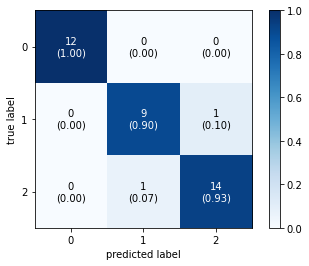

In [31]:
from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(conf_mat=confusematr1, colorbar=True, show_absolute=True, show_normed=True)

In [33]:
clf_report1=classification_report(Y_test1, Y_predict1, target_names=classLabels, digits=5, output_dict=True)
print(clf_report1)

{'setosa': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 12}, 'versicolor': {'precision': 0.9, 'recall': 0.9, 'f1-score': 0.9, 'support': 10}, 'virginica': {'precision': 0.9333333333333333, 'recall': 0.9333333333333333, 'f1-score': 0.9333333333333333, 'support': 15}, 'accuracy': 0.9459459459459459, 'macro avg': {'precision': 0.9444444444444443, 'recall': 0.9444444444444443, 'f1-score': 0.9444444444444443, 'support': 37}, 'weighted avg': {'precision': 0.9459459459459459, 'recall': 0.9459459459459459, 'f1-score': 0.9459459459459459, 'support': 37}}


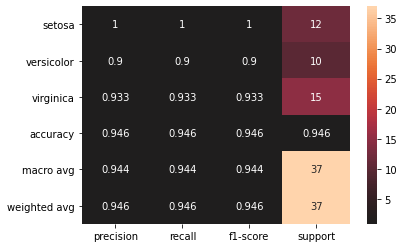

In [34]:
import seaborn as sns
sns.heatmap(pd.DataFrame(clf_report1).T, annot=True, fmt='.3g',center=True)

In [35]:
numTimes=10
accuracy=list()
for i in range(numTimes):
 X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X,Y,test_size=test_val)
 DTclassifer1 = DecisionTreeClassifier(criterion="entropy").fit(X_train1,Y_train1)
 Y_predict1=DTclassifer1.predict(X_test1)
 accuracy.append(accuracy_score(Y_test1, Y_predict1))
print(sum(accuracy)/numTimes)


0.9405405405405405


In [36]:
k=10
scores1=cross_val_score(DecisionTreeClassifier(),X,Y,cv=k)
print(scores1,scores.mean())


[1.         0.93333333 1.         0.93333333 0.93333333 0.86666667
 0.93333333 0.92857143 1.         1.        ] 0.96
